# **FraudForce: Fraud Detection System**<br>
```Description: Develop algorithms to detect fraudulent activities such as payment fraud or account takeover based on transactional data, enhancing the company's security measures.```

```Import required libraries```

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings

# Setting display options and warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

```Load Dataset```

In [2]:
df=pd.read_csv("C:/Users/tirum/Downloads/Hype intern/CreditCardData.csv/CreditCardData.csv")
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [4]:
df_describe = df.describe(include='all')

df_describe

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000,100000,100000,100000.000000,100000,100000,99994,100000,99990,100000,99995,100000,99996,100000.000000,100000,100000.000000
unique,95680,4,4,NaN,2,3,396,3,10,5,5,5,2,NaN,8,NaN
top,#2547 017,14-Oct-20,Wednesday,NaN,Visa,PIN,£17,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,NaN,Barclays,NaN
freq,5,50184,50177,NaN,53812,49976,2153,33481,10679,71199,60905,81859,50875,NaN,29936,NaN
mean,NaN,NaN,NaN,14.562870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.993770,NaN,0.071950
std,NaN,NaN,NaN,5.308195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.948494,NaN,0.258406
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000
25%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.200000,NaN,0.000000
50%,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.900000,NaN,0.000000
75%,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.700000,NaN,0.000000


``` Data Cleaning:```<br> Convert 'Amount' to numeric after stripping non-numeric characters


In [ ]:

# Convert 'Amount' by removing currency symbol and converting to float
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)



In [ ]:
# Check for missing values and handle them (by filling with mode/mean or dropping if appropriate)
missing_values = df.isnull().sum()
missing_values

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

Here the dataset contain null values at 4 columns such as 'Amount','Merchant Group', 'Shipping Address' and 'Gender' corresponding to 6,10,5 and 4.

In [ ]:
# Filling missing values 
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Merchant Group'].fillna(df['Merchant Group'].mode()[0], inplace=True)
df['Shipping Address'].fillna(df['Shipping Address'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [8]:
# Verify data after cleaning
data_cleaned_summary = df.describe(include='all')
data_cleaned_summary

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000,100000,100000,100000,100000,100000.000000,100000,100000.000000
unique,95680,4,4,NaN,2,3,NaN,3,10,5,5,5,2,NaN,8,NaN
top,#2547 017,14-Oct-20,Wednesday,NaN,Visa,PIN,NaN,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,NaN,Barclays,NaN
freq,5,50184,50177,NaN,53812,49976,NaN,33481,10689,71199,60910,81859,50879,NaN,29936,NaN
mean,NaN,NaN,NaN,14.562870,NaN,NaN,112.573560,NaN,NaN,NaN,NaN,NaN,NaN,44.993770,NaN,0.071950
std,NaN,NaN,NaN,5.308195,NaN,NaN,123.431847,NaN,NaN,NaN,NaN,NaN,NaN,9.948494,NaN,0.258406
min,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000
25%,NaN,NaN,NaN,10.000000,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,38.200000,NaN,0.000000
50%,NaN,NaN,NaN,15.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.900000,NaN,0.000000
75%,NaN,NaN,NaN,19.000000,NaN,NaN,208.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.700000,NaN,0.000000


In [9]:
missing_values_after_cleaning = df.isnull().sum()
missing_values_after_cleaning

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

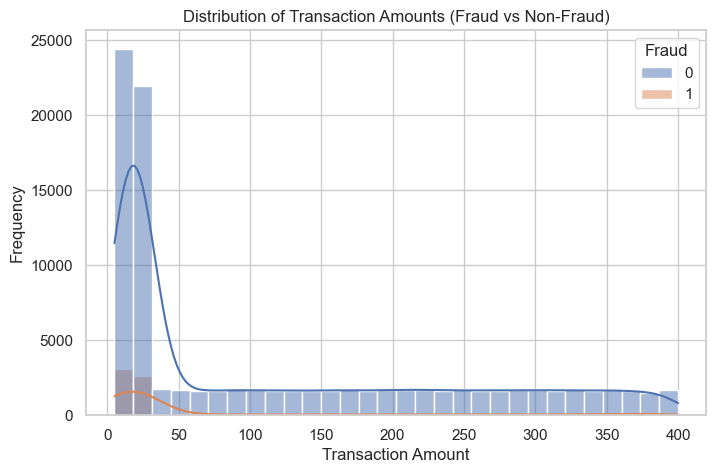

In [10]:
sns.set(style="whitegrid")

# 1. Distribution of transaction amounts for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Amount', hue='Fraud', bins=30, kde=True)
plt.title("Distribution of Transaction Amounts (Fraud vs Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

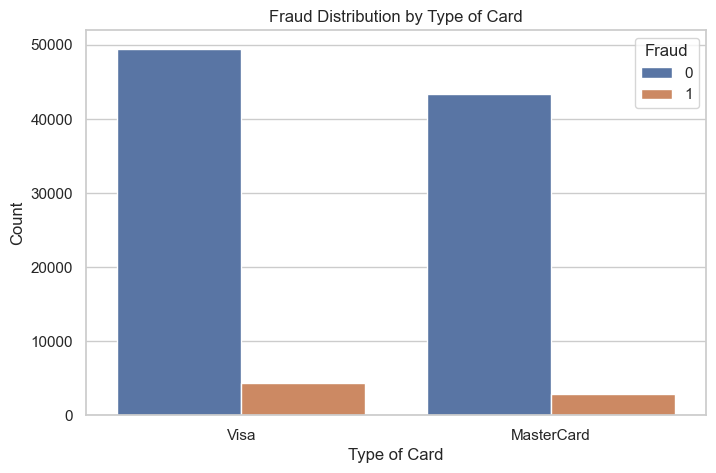

In [11]:
# 2. Fraud distribution across types of cards
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type of Card', hue='Fraud')
plt.title("Fraud Distribution by Type of Card")
plt.xlabel("Type of Card")
plt.ylabel("Count")
plt.show()

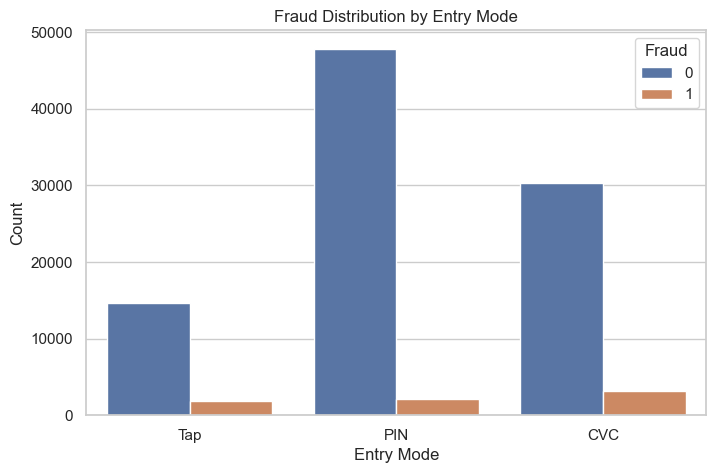

In [12]:
# 3. Fraud frequency based on Entry Mode
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Entry Mode', hue='Fraud')
plt.title("Fraud Distribution by Entry Mode")
plt.xlabel("Entry Mode")
plt.ylabel("Count")
plt.show()

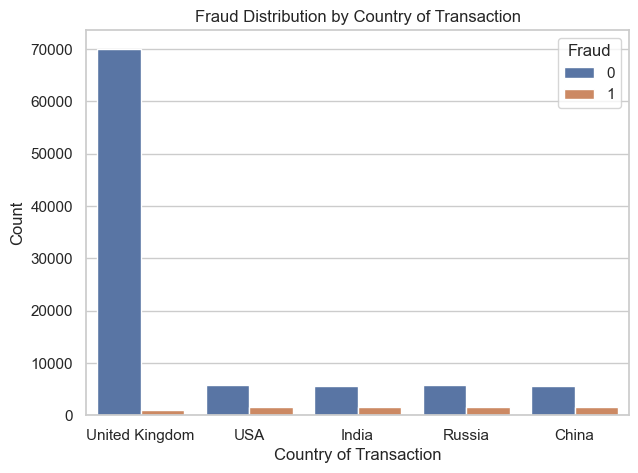

In [13]:
# 4. Fraud distribution by country of transaction
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Country of Transaction', hue='Fraud')
plt.title("Fraud Distribution by Country of Transaction")
plt.xlabel("Country of Transaction")
plt.ylabel("Count")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

```Data Preprocessing```


In [ ]:
# Separate features and target variable
X = df.drop(columns=['Fraud'])  # Features
y = df['Fraud'] 

In [16]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['Transaction ID', 'Date', 'Day of Week', 'Type of Card', 'Entry Mode',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Shipping Address', 'Country of Residence', 'Gender', 'Bank'],
      dtype='object')

In [17]:

num_cols = X.select_dtypes(exclude='object').columns
num_cols

Index(['Time', 'Amount', 'Age'], dtype='object')

In [18]:
# Build preprocessing pipeline: handle missing values, encode categoricals, scale numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                                ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ])

In [19]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [20]:
# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}



In [21]:
# Dictionary to store model performance results
model_performance = {}

In [22]:
# Train and evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    

In [23]:
# Train the model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Time', 'Amount', 'Age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Transaction ID', 'Date', 'Day of Week', 'Type of Card', 'Entry Mode',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Shipping Address', 'Country of Residence', 'Gender', 'Bank'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
# Predict on test data
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_proba

array([0.  , 0.  , 0.03, ..., 0.  , 0.  , 0.  ])

In [27]:
# Evaluate model
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
class_report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [28]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     27791\n           1       0.99      0.72      0.83      2209\n\n    accuracy                           0.98     30000\n   macro avg       0.98      0.86      0.91     30000\nweighted avg       0.98      0.98      0.98     30000\n'

In [29]:
confusion

array([[27773,    18],
       [  623,  1586]], dtype=int64)

In [30]:
# Store results
model_performance[model_name] = {
    "Accuracy": acc,
    "AUC": auc,
    "Classification Report": class_report,
    "Confusion Matrix": confusion
}

model_performance

{'Random Forest': {'Accuracy': 0.9786333333333334,
  'AUC': 0.9927042486943258,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     27791\n           1       0.99      0.72      0.83      2209\n\n    accuracy                           0.98     30000\n   macro avg       0.98      0.86      0.91     30000\nweighted avg       0.98      0.98      0.98     30000\n',
  'Confusion Matrix': array([[27773,    18],
         [  623,  1586]], dtype=int64)}}

In [31]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Preprocess training data first
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Use SMOTE on preprocessed data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

In [ ]:
# Set up the Random Forest pipeline and hyperparameter tuning with GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_bal, y_train_bal)  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [35]:
# Retrieve the best model
best_rf_model = grid_search.best_estimator_


In [ ]:
# Evaluate on test set and save the best model
y_pred = best_rf_model.predict(X_test_processed)
y_proba = best_rf_model.predict_proba(X_test_processed)[:, 1]


``` Model evaluation ```


In [ ]:
print("Best Model AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Model AUC: 0.992474921005053
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     27791
           1       0.97      0.74      0.84      2209

    accuracy                           0.98     30000
   macro avg       0.97      0.87      0.91     30000
weighted avg       0.98      0.98      0.98     30000



In [38]:
# Save the best model
joblib.dump(best_rf_model, 'best_rf_fraud_detection_model.pkl')

['best_rf_fraud_detection_model.pkl']